In [1]:
import os
import random

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
import statsmodels.api as sm
# from sklearn.metrics import r2_score

def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)

# 시드 고정
seed_everything(42)

df = pd.read_csv('K-League-data.csv').drop(columns='Unnamed: 0')

In [2]:
df = df.sort_values('시즌').sort_values('Rnd.')

In [3]:
X = df.drop(columns=['대회', '홈 경기결과', '원정 경기결과']) # 필요 없거나 중복되는 열 제거
X = pd.get_dummies(X, columns=['홈 팀', '원정 팀'], drop_first=False) # 문자 숫자로 바꾸기

y = df['홈 경기결과']  # 홈 팀 기준으로 승부 예측. (홈 승? >> 원정 패, 홈 패? >> 원정 승리) // 원정 경기결과를 넣어도 예측 결과 동일

# 경기 결과 (W, D, L)를 숫자로 
le = LabelEncoder()
y = le.fit_transform(y)

# train/test 분리. 데이터셋의 개수가 작아서 9:1로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)

# scaler = StandardScaler()  
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(615, 122) (69, 122)
(615,) (69,)


In [4]:
# 다항 로지스틱 회귀

model = LogisticRegression(random_state=42, solver='newton-cg',max_iter=500)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Accuracy: 0.8115942028985508
              precision    recall  f1-score   support

           0       0.79      0.62      0.70        24
           1       0.65      0.89      0.76        19
           2       1.00      0.92      0.96        26

    accuracy                           0.81        69
   macro avg       0.81      0.81      0.80        69
weighted avg       0.83      0.81      0.81        69

[[15  9  0]
 [ 2 17  0]
 [ 2  0 24]]
0.8115942028985508
0.6195589088798608


In [5]:
# 다층신경망

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=42, max_iter=500)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        24
           1       0.50      0.63      0.56        19
           2       0.89      0.92      0.91        26

    accuracy                           0.67        69
   macro avg       0.65      0.66      0.65        69
weighted avg       0.67      0.67      0.66        69

[[10 12  2]
 [ 6 12  1]
 [ 2  0 24]]
0.6666666666666666
0.2991874637260593


In [6]:
# LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Accuracy: 0.8405797101449275
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.76      0.84      0.80        19
           2       0.96      0.92      0.94        26

    accuracy                           0.84        69
   macro avg       0.83      0.84      0.84        69
weighted avg       0.84      0.84      0.84        69

[[18  5  1]
 [ 3 16  0]
 [ 2  0 24]]
0.8405797101449275
0.5995356935577483


In [7]:
# SVM

from sklearn import svm

model = svm.SVC(random_state=42, kernel='linear')
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Accuracy: 0.9420289855072463
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.89      0.94        19
           2       1.00      0.92      0.96        26

    accuracy                           0.94        69
   macro avg       0.95      0.94      0.94        69
weighted avg       0.95      0.94      0.94        69

[[24  0  0]
 [ 2 17  0]
 [ 2  0 24]]
0.9420289855072463
0.7997678467788741


In [8]:
# 그래디언트부스팅

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42, max_depth=3, n_estimators=500, )
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
print(feature_importance_df[:10])

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Accuracy: 0.9855072463768116
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       1.00      1.00      1.00        19
           2       0.96      1.00      0.98        26

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69

[[23  0  1]
 [ 0 19  0]
 [ 0  0 26]]
       Feature  Importance
1         홈 득점    0.486231
48       원정 득점    0.451148
79     원정 클리어링    0.007746
30     홈 경합 공중    0.004266
77    원정 경합 공중    0.004257
40        홈 경고    0.003323
4      홈 유효 슈팅    0.002805
24       홈 롱패스    0.002729
72    원정 중거리패스    0.002528
68  원정 공격진영 패스    0.002318
0.9855072463768116
0.9199071387115496


In [9]:
# 에이다 부스트

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=42,)
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:10]

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

c:\Users\HONG\miniconda3\envs\zxcv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.5942028985507246
              precision    recall  f1-score   support

           0       0.43      0.50      0.46        24
           1       0.73      0.58      0.65        19
           2       0.69      0.69      0.69        26

    accuracy                           0.59        69
   macro avg       0.62      0.59      0.60        69
weighted avg       0.61      0.59      0.60        69

[[12  4  8]
 [ 8 11  0]
 [ 8  0 18]]
0.5942028985507246
-0.5217643644805567


In [10]:
# XgBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:10]

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Accuracy: 0.9710144927536232
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.95      0.95      0.95        19
           2       1.00      1.00      1.00        26

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69

[[23  1  0]
 [ 1 18  0]
 [ 0  0 26]]
0.9710144927536232
0.9599535693557748


In [11]:
# CatBoost
from catboost import CatBoostClassifier


model = CatBoostClassifier(random_seed=42, metric_period=100, depth=4)

model.fit(X_train_scaled, y_train)  # Specify categorical features

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:10]

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Learning rate set to 0.077189
0:	learn: 0.9908774	total: 160ms	remaining: 2m 39s
100:	learn: 0.1760879	total: 543ms	remaining: 4.83s
200:	learn: 0.1111060	total: 918ms	remaining: 3.65s
300:	learn: 0.0836871	total: 1.29s	remaining: 2.99s
400:	learn: 0.0658614	total: 1.63s	remaining: 2.43s
500:	learn: 0.0520345	total: 1.99s	remaining: 1.98s
600:	learn: 0.0401951	total: 2.36s	remaining: 1.56s
700:	learn: 0.0347656	total: 2.74s	remaining: 1.17s
800:	learn: 0.0308875	total: 3.2s	remaining: 796ms
900:	learn: 0.0248042	total: 3.64s	remaining: 400ms
999:	learn: 0.0218145	total: 4.03s	remaining: 0us
Accuracy: 0.9855072463768116
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       1.00      1.00      1.00        19
           2       0.96      1.00      0.98        26

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99    

# 변수선택법 적용

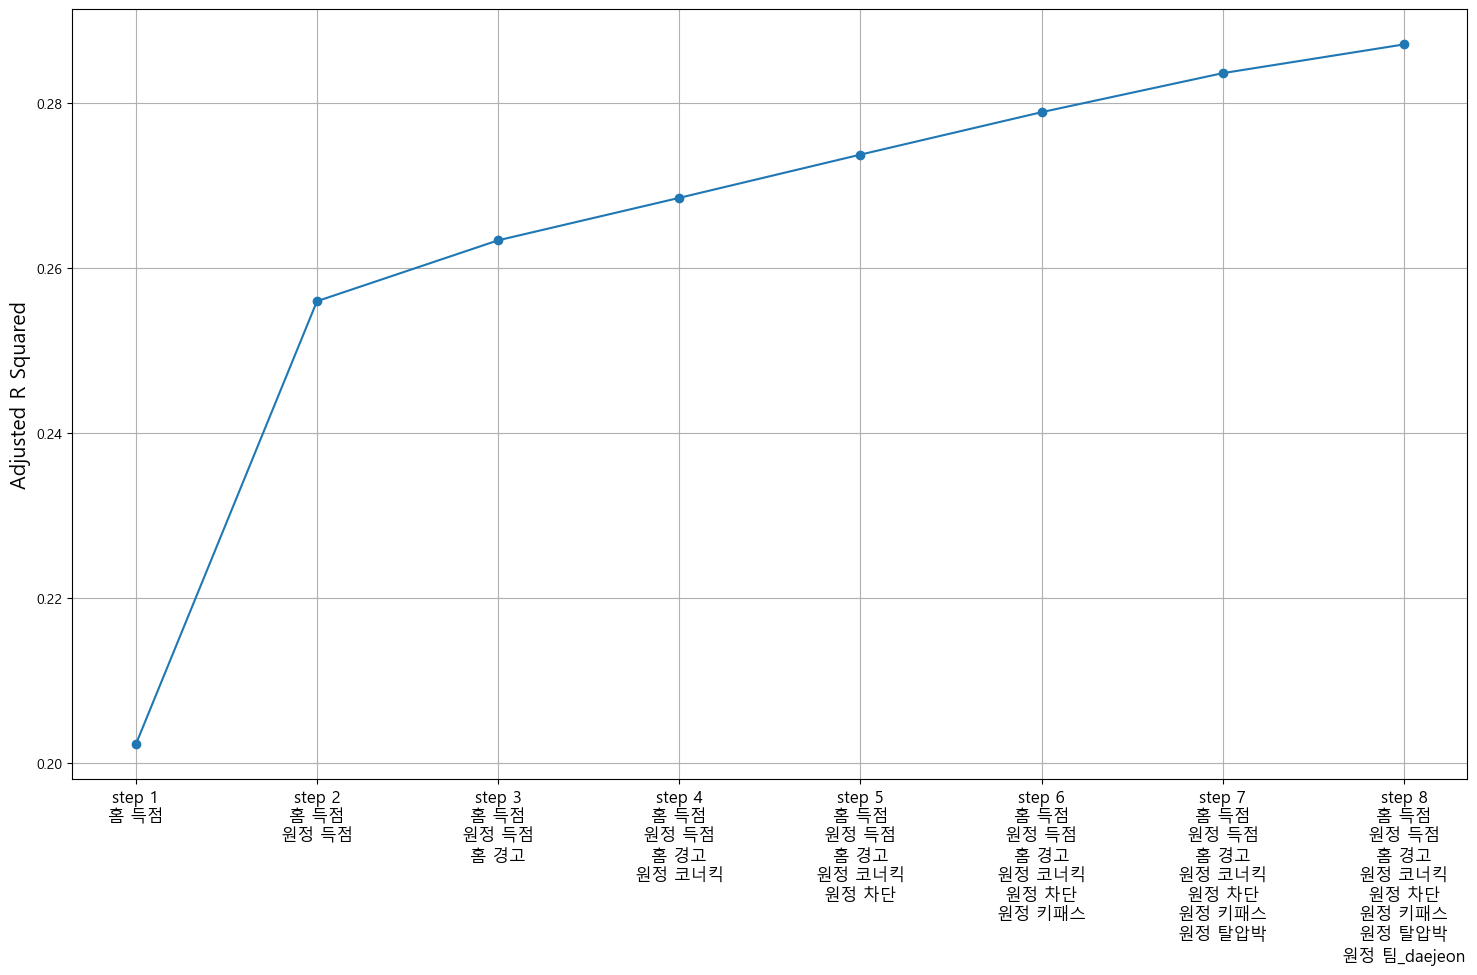

['홈 득점',
 '원정 득점',
 '홈 경고',
 '원정 코너킥',
 '원정 차단',
 '원정 키패스',
 '원정 탈압박',
 '원정 팀_daejeon']

In [12]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    plt.rcParams['font.family'] = 'Malgun Gothic'

    
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            
            X = X_train[selected_variables+[col]]
            # print(X)
            X = sm.add_constant(X)
            # print(type(X))
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(18,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables
    


# X_train에서 불리언 열만 선택
boolean_columns = X_train.select_dtypes(include='bool').columns
# 선택된 불리언 열을 정수(0 또는 1)로 변환
X_train[boolean_columns] = X_train[boolean_columns].astype(int)

selected_variables = stepwise_feature_selection(X_train, y_train)
selected_variables

In [13]:
selected_X_train = X_train[selected_variables]
selected_X_test = X_test[selected_variables]

# 확인
print(selected_X_train.shape, selected_X_test.shape)
print(y_train.shape, y_test.shape)

scaler = RobustScaler()
selected_X_train_scaled = scaler.fit_transform(selected_X_train)
selected_X_test_scaled = scaler.transform(selected_X_test)

(615, 8) (69, 8)
(615,) (69,)


In [14]:
# 변수 선택법 적용한 다항 로지스틱 회귀

model = LogisticRegression(random_state=42, solver='newton-cg', max_iter=500)
model.fit(selected_X_train_scaled, y_train)

y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Accuracy: 0.9855072463768116
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        26

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

[[23  1  0]
 [ 0 19  0]
 [ 0  0 26]]
0.9855072463768116
0.9799767846778874


In [15]:
# 변수 선택법 적용한 다층신경망

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=42, max_iter=500)
model.fit(selected_X_train_scaled, y_train)

y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Accuracy: 0.9855072463768116
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        26

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

[[23  1  0]
 [ 0 19  0]
 [ 0  0 26]]
0.9855072463768116
0.9799767846778874


In [16]:
# 변수 선택법 적용한 LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Accuracy: 0.9710144927536232
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.95      0.95      0.95        19
           2       1.00      1.00      1.00        26

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69

[[23  1  0]
 [ 1 18  0]
 [ 0  0 26]]
0.9710144927536232
0.9599535693557748


In [17]:
# 변수 선택법 적용 후 svm

from sklearn import svm

model = svm.SVC(random_state=42, kernel='linear')
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        26

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

[[24  0  0]
 [ 0 19  0]
 [ 0  0 26]]
1.0
1.0


In [18]:
# 변수 선택법 적용한 그래디언트부스팅

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42, max_depth=3, n_estimators=500, )
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:]

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Accuracy: 0.9710144927536232
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.95      1.00      0.97        19
           2       0.96      1.00      0.98        26

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69

[[22  1  1]
 [ 0 19  0]
 [ 0  0 26]]
0.9710144927536232
0.899883923389437


In [19]:
# 변수 선택법 적용한 에이다 부스트

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=42,)
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:]

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Accuracy: 0.5362318840579711
              precision    recall  f1-score   support

           0       0.32      0.29      0.30        24
           1       0.55      0.58      0.56        19
           2       0.70      0.73      0.72        26

    accuracy                           0.54        69
   macro avg       0.52      0.53      0.53        69
weighted avg       0.53      0.54      0.53        69

[[ 7  9  8]
 [ 8 11  0]
 [ 7  0 19]]
0.5362318840579711
-0.5417875798026695


In [20]:
# 변수 선택법 적용한 XgBoost
model = XGBClassifier()

model.fit(selected_X_train_scaled, y_train)

y_pred = model.predict(selected_X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:]

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Accuracy: 0.9855072463768116
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        26

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

[[23  1  0]
 [ 0 19  0]
 [ 0  0 26]]
0.9855072463768116
0.9799767846778874


In [21]:
# 변수 선택법 적용한 CatBoost


model = CatBoostClassifier(random_seed=42, metric_period=100, depth=2)

model.fit(selected_X_train_scaled, y_train)  

y_pred = model.predict(selected_X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:]

f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)
print(f1)
print(r2)

Learning rate set to 0.077189
0:	learn: 1.0378968	total: 675us	remaining: 675ms
100:	learn: 0.2246633	total: 39.6ms	remaining: 352ms
200:	learn: 0.1472765	total: 79.5ms	remaining: 316ms
300:	learn: 0.1171562	total: 115ms	remaining: 266ms
400:	learn: 0.0989297	total: 149ms	remaining: 223ms
500:	learn: 0.0860974	total: 186ms	remaining: 186ms
600:	learn: 0.0759882	total: 222ms	remaining: 148ms
700:	learn: 0.0669968	total: 257ms	remaining: 110ms
800:	learn: 0.0609659	total: 298ms	remaining: 74ms
900:	learn: 0.0562326	total: 340ms	remaining: 37.4ms
999:	learn: 0.0511979	total: 377ms	remaining: 0us
Accuracy: 0.9855072463768116
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        26

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99  